In [49]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Step 2: Load Data
df = pd.read_csv("../../src/data/vgsales.csv")
df.head()  # View first few rows

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [51]:
# Step 3: Check Info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [52]:
# Step 4: Check Missing Values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [53]:
# Step 5: Drop rows with missing target (Global_Sales)
df = df.dropna(subset=["Global_Sales"])

In [54]:
# Step 6: Handle missing Year - convert to int 
df = df.dropna(subset=["Year"])
df["Year"] = df["Year"].astype(int)

In [55]:
# Step 7: Drop Rank and Name (not useful for modeling)
df = df.drop(columns=["Rank", "Name"])

In [56]:
# Step 8: Feature Engineering
# Convert year to game age (2025 - year)
df["Game_Age"] = 2025 - df["Year"]

In [57]:
# Step 9: One-hot encode categorical variables (Platform, Genre, Publisher)
#df = pd.get_dummies(df, columns=["Platform", "Genre"], drop_first=True)

In [58]:
# Step 10: Group rare publishers as "Other" and encode
#publisher_counts = df["Publisher"].value_counts()
#rare_publishers = publisher_counts[publisher_counts < 50].index
#df["Publisher"] = df["Publisher"].apply(lambda x: "Other" if x in rare_publishers else x)
#df = pd.get_dummies(df, columns=["Publisher"], drop_first=True)

In [59]:
print(df.columns)

Index(['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Game_Age'],
      dtype='object')


In [60]:
# Step 11: Save cleaned data
df.to_csv("../../src/data/processed/fc110570_cleaned_vgsales.csv", index=False)
print("Cleaned data saved!")

Cleaned data saved!


In [61]:
# Step 12: Exploratory Data Analysis

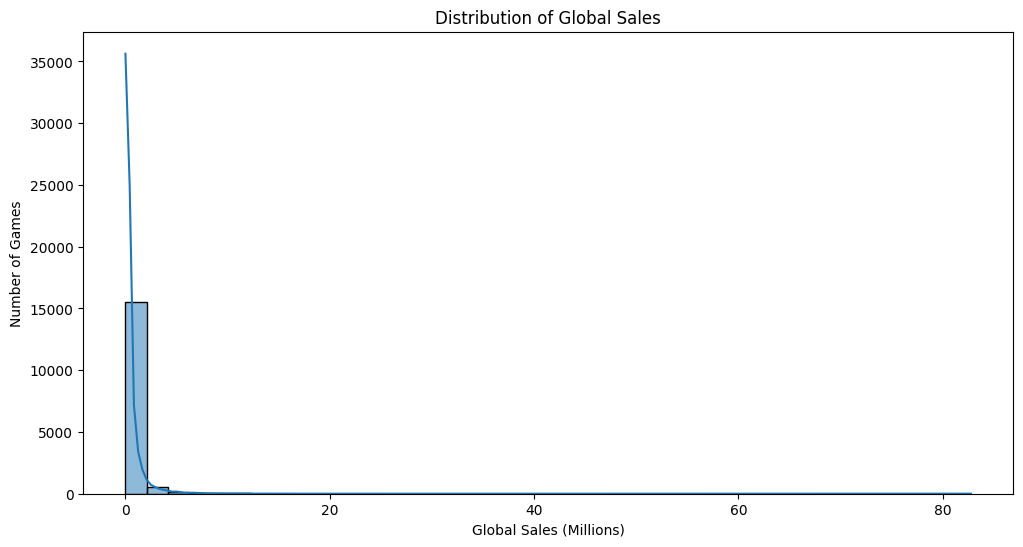

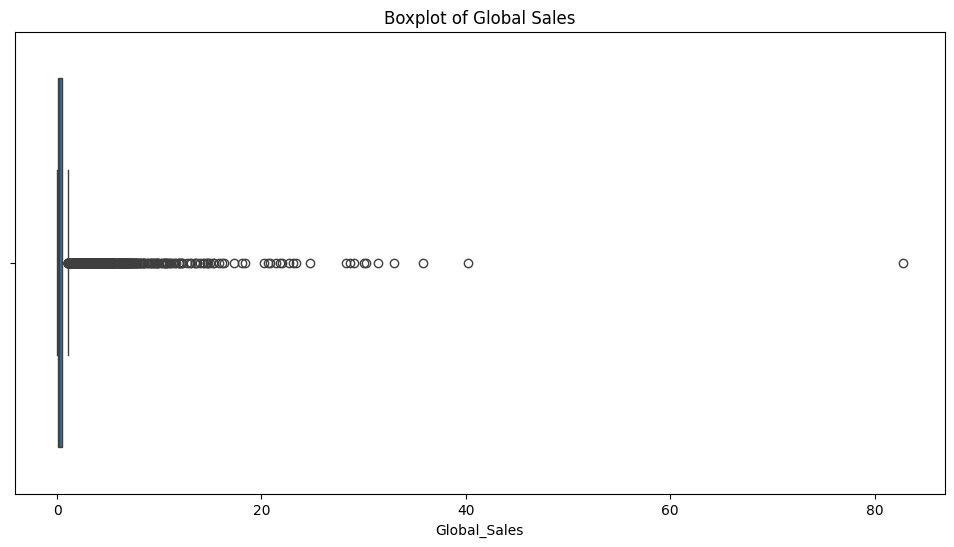

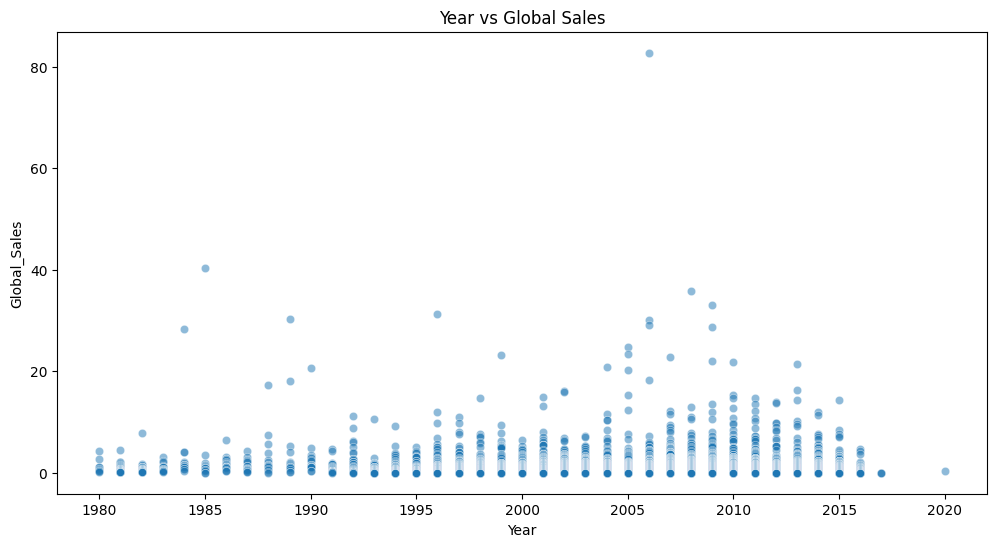

In [62]:
# 12.1: Distribution of Global Sales
plt.figure(figsize=(12,6))
sns.histplot(df["Global_Sales"], bins=40, kde=True)
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Number of Games")
plt.show()


# Boxplot for Global Sales to check for outliers
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Global_Sales"])
plt.title("Boxplot of Global Sales")
plt.show()



# Scatterplot for Global Sales vs Year
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Year", y="Global_Sales", alpha=0.5)
plt.title("Year vs Global Sales")
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

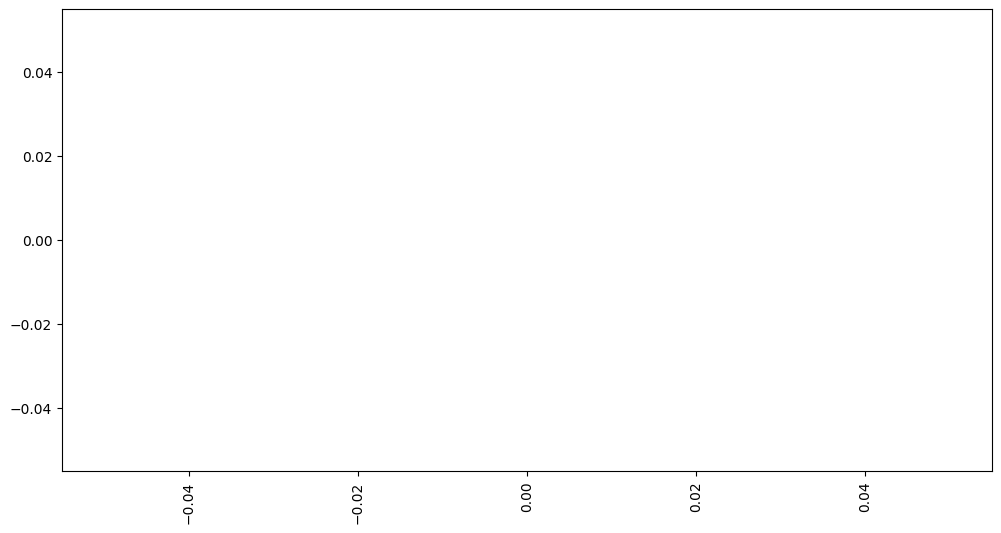

In [63]:
# 12.2: Global Sales by Genre (top 10)
plt.figure(figsize=(12,6))
top_genres = df.filter(like="Genre_").sum().sort_values(ascending=False)[:10]
top_genres.plot(kind="bar", color="skyblue")
plt.title("Top 10 Genres by Frequency")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.show()


# Boxplot of Global Sales by Genre (top 10 genres for clarity)
top_10_genres = df.filter(like="Genre_").sum().sort_values(ascending=False).index[:10]
genre_cols = [col for col in top_10_genres]
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x=df[genre_cols].idxmax(axis=1), y=df["Global_Sales"])
plt.title("Global Sales Distribution by Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Global Sales")
plt.xticks(rotation=45)
plt.show()

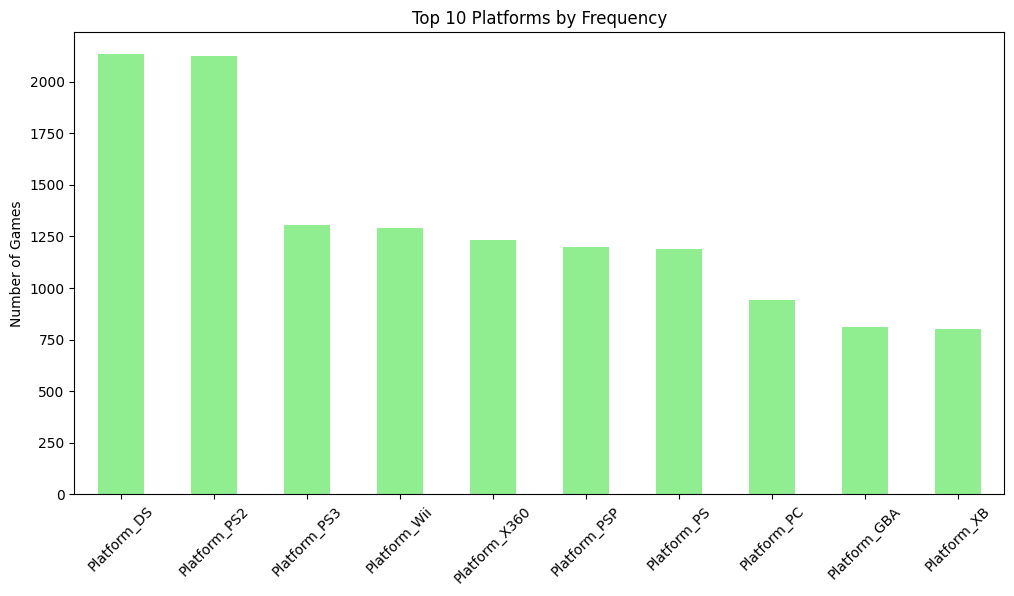

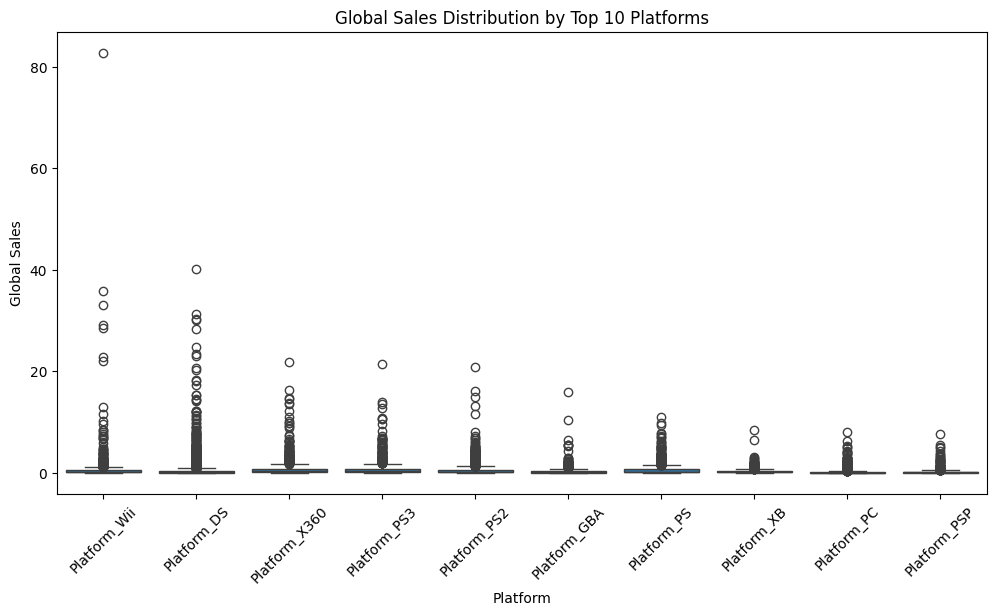

In [ ]:
# 12.3: Global Sales by Platform (top 10)
plt.figure(figsize=(12,6))
top_platforms = df.filter(like="Platform_").sum().sort_values(ascending=False)[:10]
top_platforms.plot(kind="bar", color="lightgreen")
plt.title("Top 10 Platforms by Frequency")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.show()


# Boxplot of Global Sales by Platform (top 10 platforms)
top_10_platforms = df.filter(like="Platform_").sum().sort_values(ascending=False).index[:10]
platform_cols = [col for col in top_10_platforms]
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x=df[platform_cols].idxmax(axis=1), y=df["Global_Sales"])
plt.title("Global Sales Distribution by Top 10 Platforms")
plt.xlabel("Platform")
plt.ylabel("Global Sales")
plt.xticks(rotation=45)
plt.show()

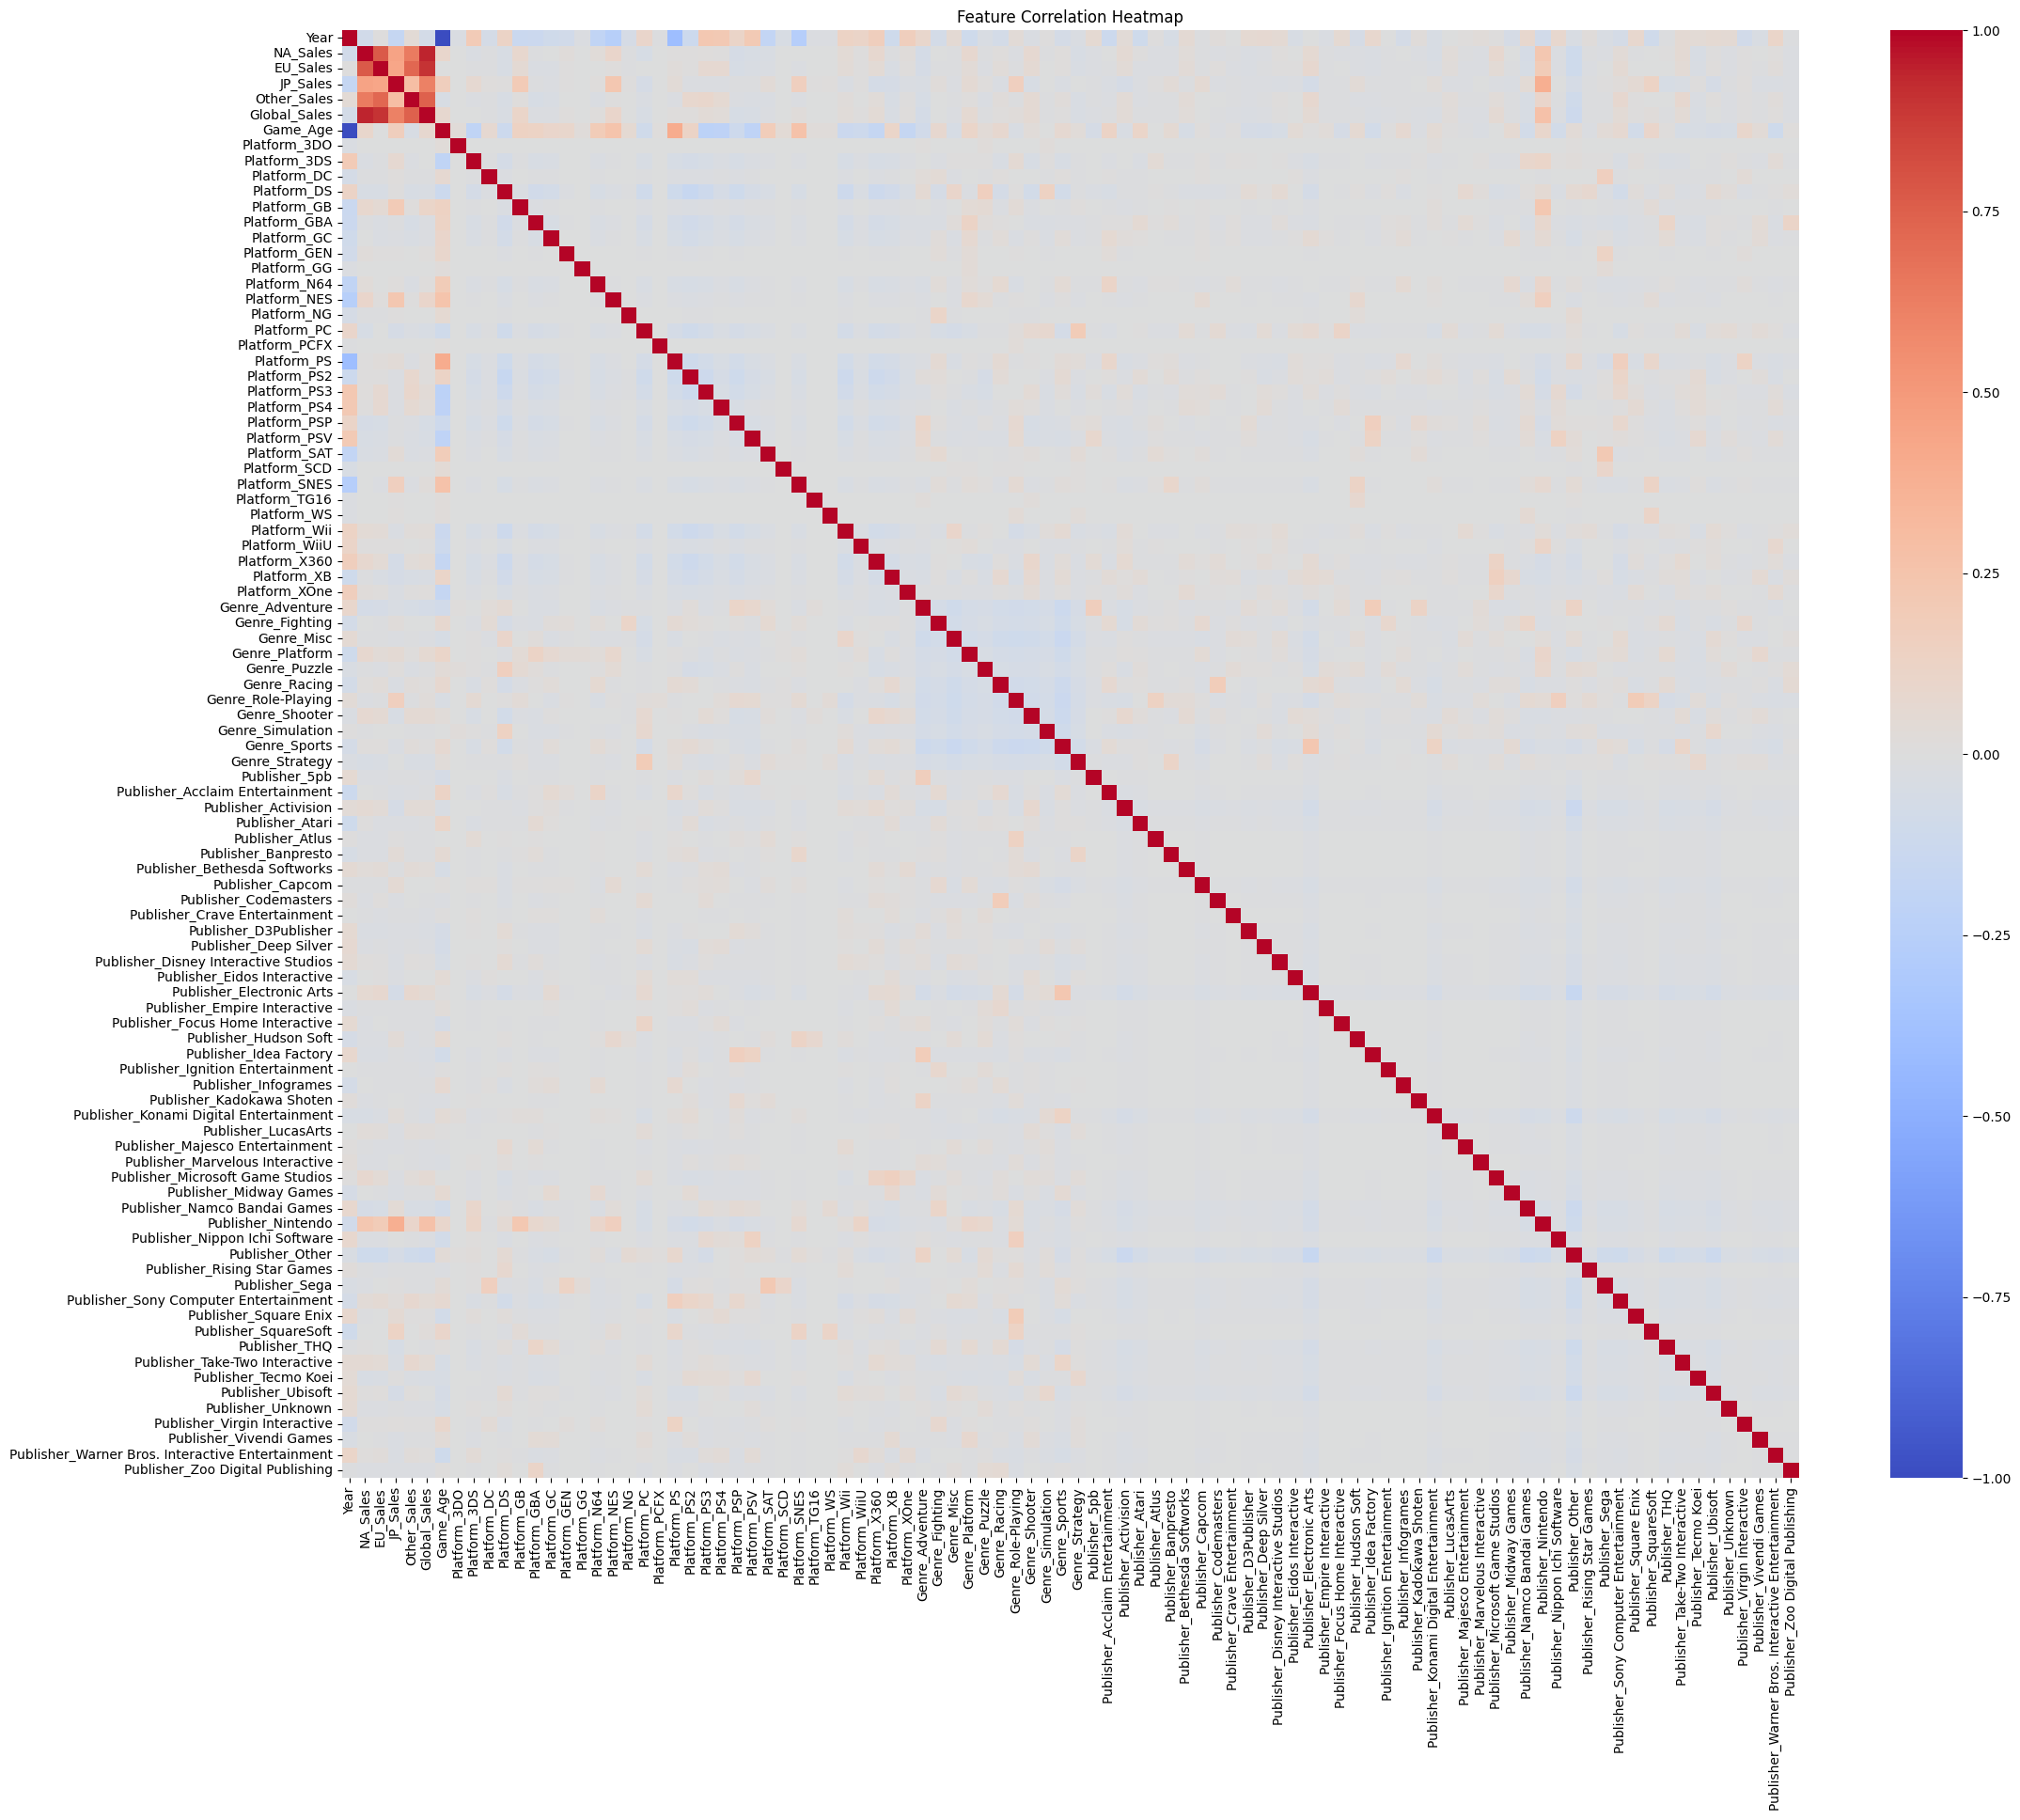

In [ ]:
# 12.4: Correlation Heatmap
plt.figure(figsize=(25,20))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()
